<a href="https://colab.research.google.com/github/apexro45/SUPERSTORE_EDA/blob/main/SUPERSTORE_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()


Saving train(1).csv to train(1).csv


In [7]:
df = pd.read_csv("train(1).csv")

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [15]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [32]:
df_cleaned = df.dropna(subset=['Postal Code'])
clean_data = df_cleaned.isnull().sum()
print("\nMissing values after cleaning:")
print(clean_data)





Missing values after cleaning:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [33]:
descriptive_stats = df.describe()
print("\nDescriptive statistics:")
print(descriptive_stats)



Descriptive statistics:
            Row ID   Postal Code         Sales
count  9800.000000   9800.000000   9800.000000
mean   4900.500000  55295.655714    230.769059
std    2829.160653  32035.893637    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  59253.500000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


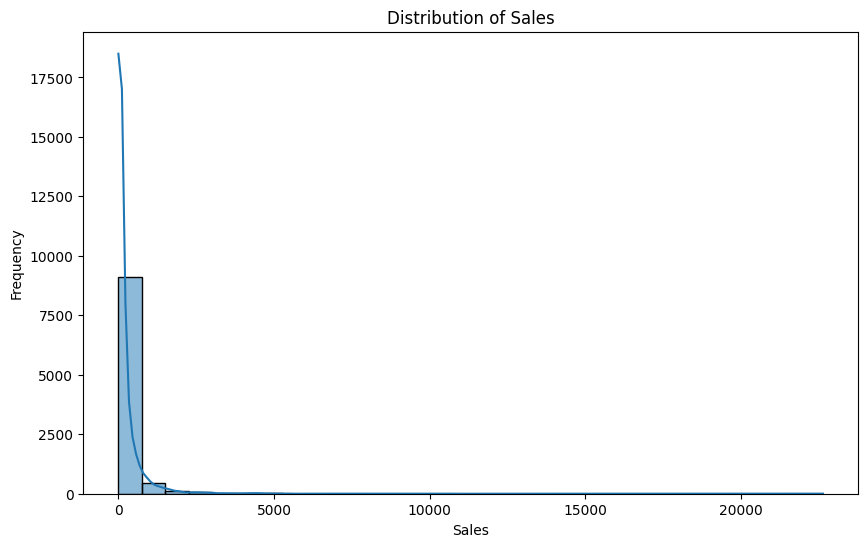

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

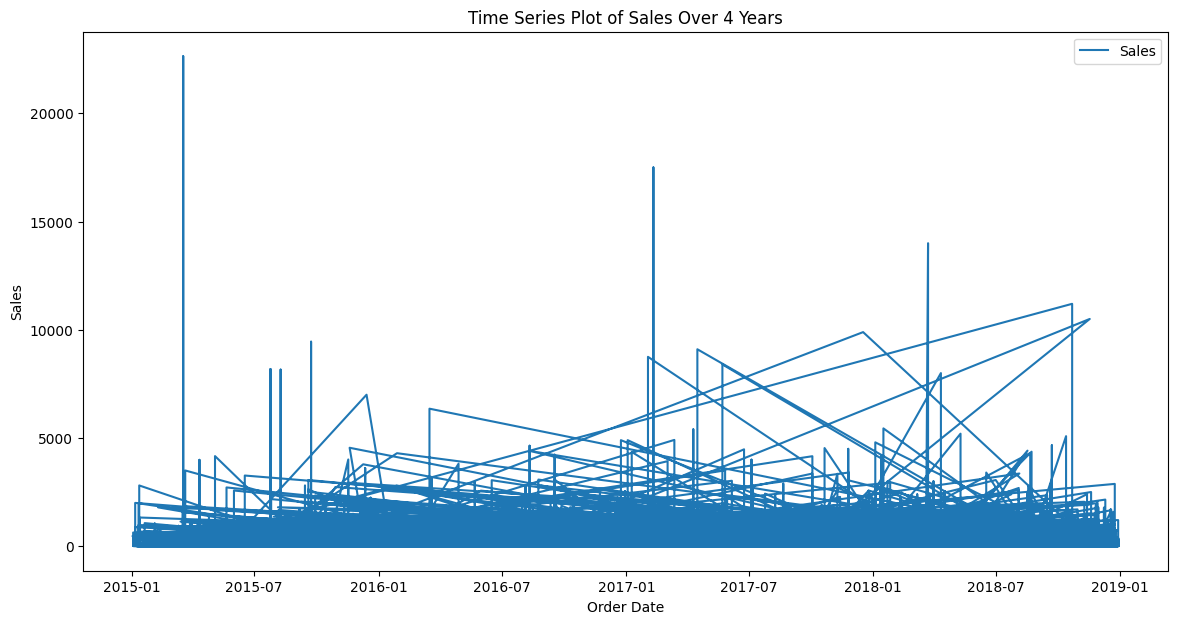

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


# Step 7: Time Series Plots
plt.figure(figsize=(14, 7))
plt.plot(df_time_series['Sales'], label='Sales')
plt.title('Time Series Plot of Sales Over 4 Years')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

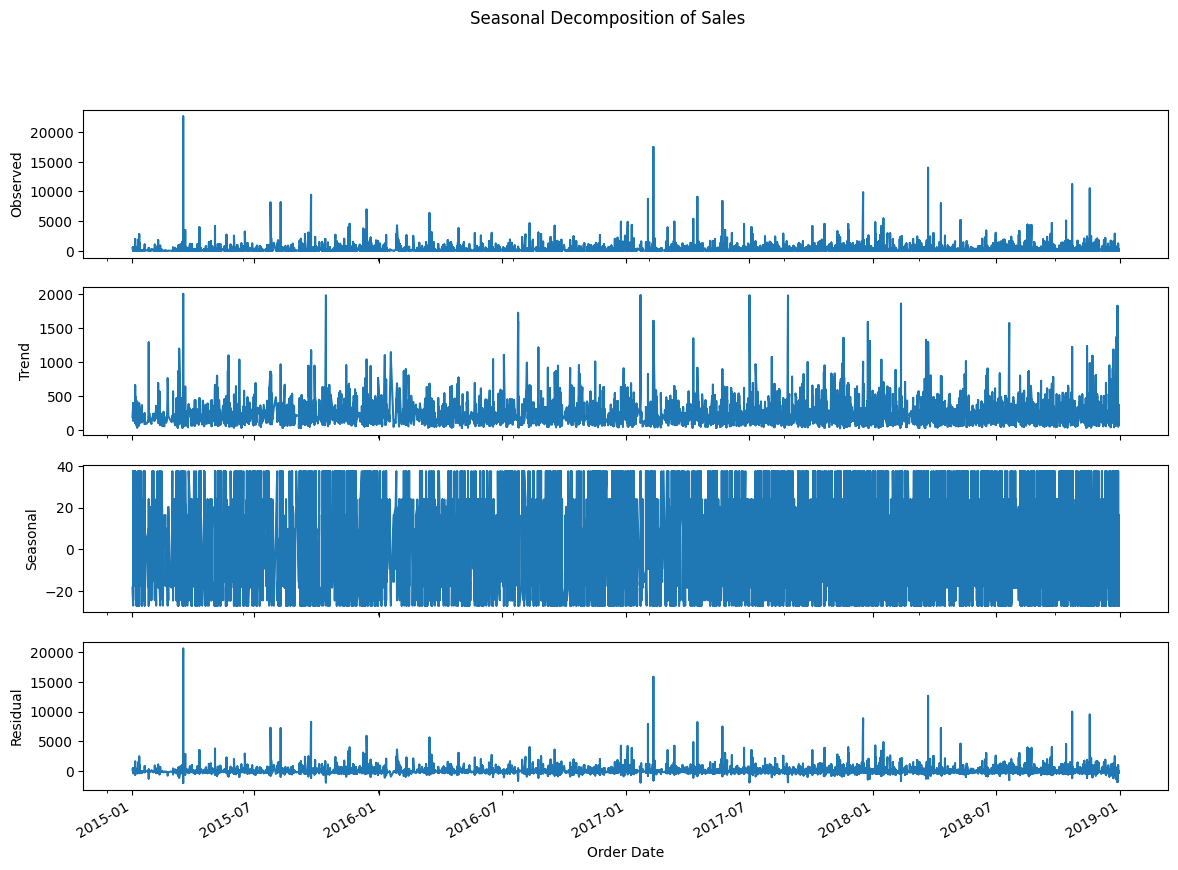

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_time_series['Sales'], model='additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.xlabel('Order Date')
plt.suptitle('Seasonal Decomposition of Sales')
plt.show()



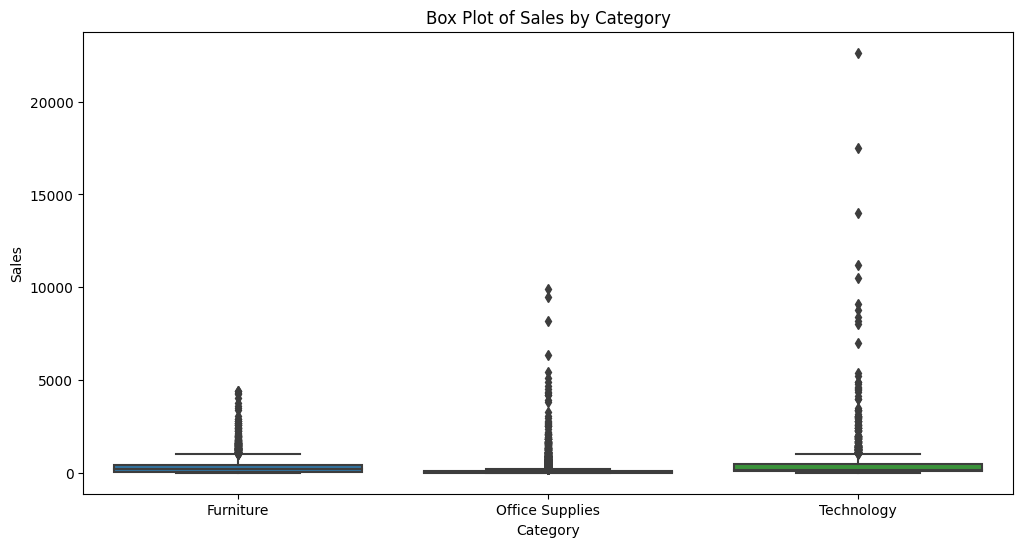

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Box Plot of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

<ipython-input-40-9196a6ffb58c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_time_series.resample('M').mean()['Sales'].plot(label='Monthly Mean Sales')
<ipython-input-40-9196a6ffb58c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_time_series.resample('Q').mean()['Sales'].plot(label='Quarterly Mean Sales')
<ipython-input-40-9196a6ffb58c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_time_series.resam

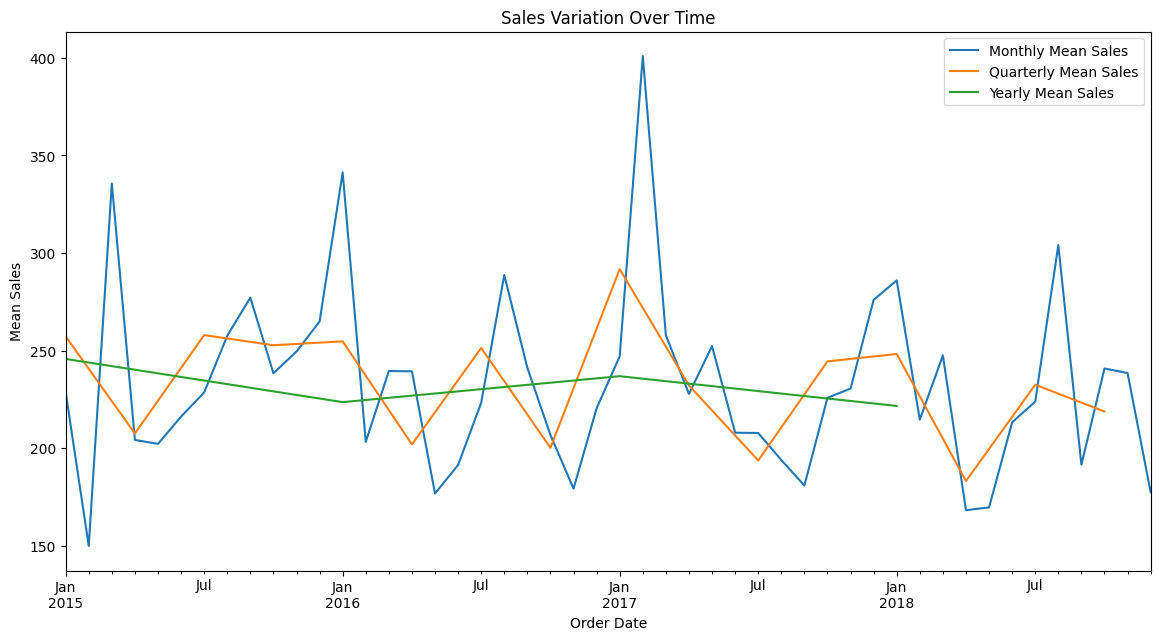

In [40]:
plt.figure(figsize=(14, 7))
df_time_series.resample('M').mean()['Sales'].plot(label='Monthly Mean Sales')
df_time_series.resample('Q').mean()['Sales'].plot(label='Quarterly Mean Sales')
df_time_series.resample('Y').mean()['Sales'].plot(label='Yearly Mean Sales')
plt.title('Sales Variation Over Time')
plt.xlabel('Order Date')
plt.ylabel('Mean Sales')
plt.legend()
plt.show()

<ipython-input-41-d58e4f39cc15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


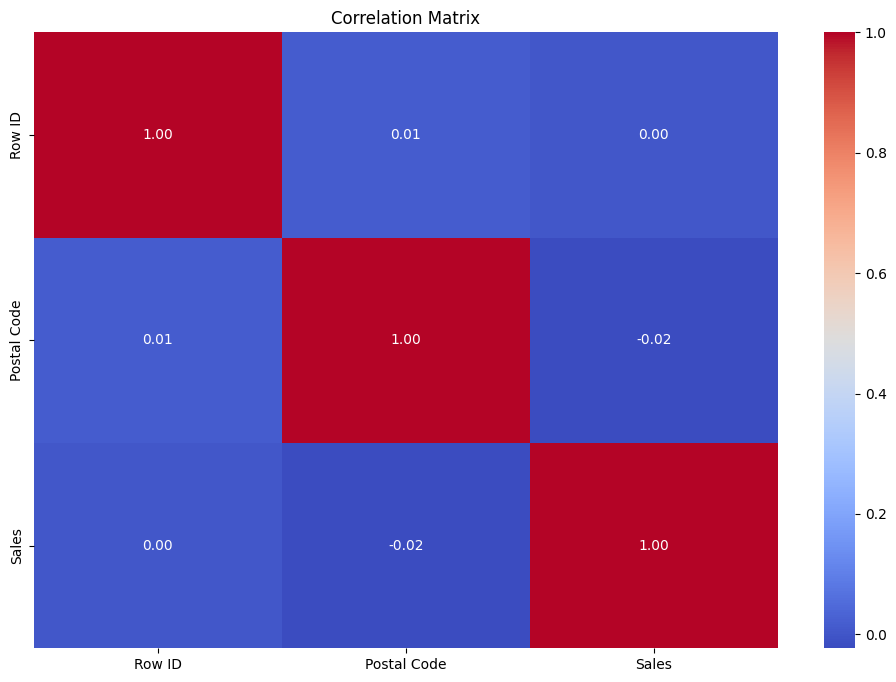

In [41]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

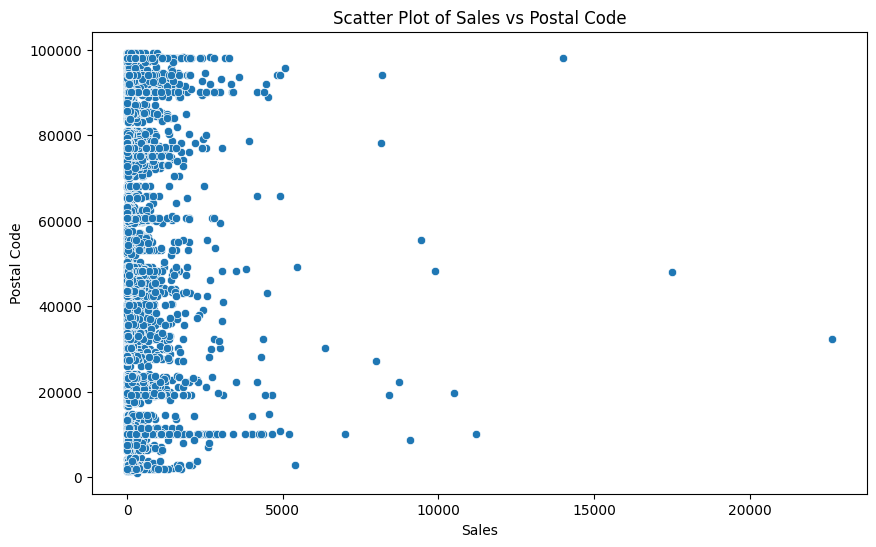

In [44]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Postal Code', data=df)
plt.title('Scatter Plot of Sales vs Postal Code')
plt.xlabel('Sales')
plt.ylabel('Postal Code')
plt.show()

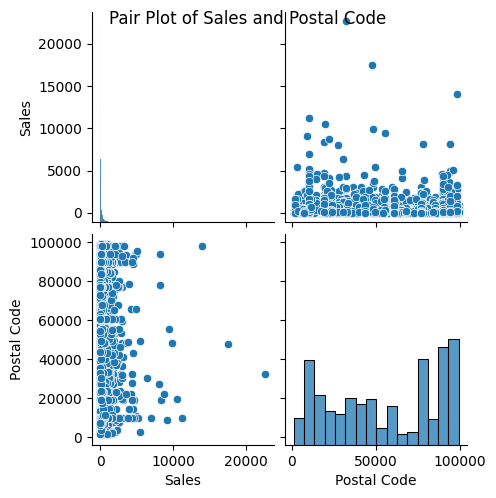

In [45]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
numeric_columns = ['Sales', 'Postal Code']

sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Sales and Postal Code')
plt.show()


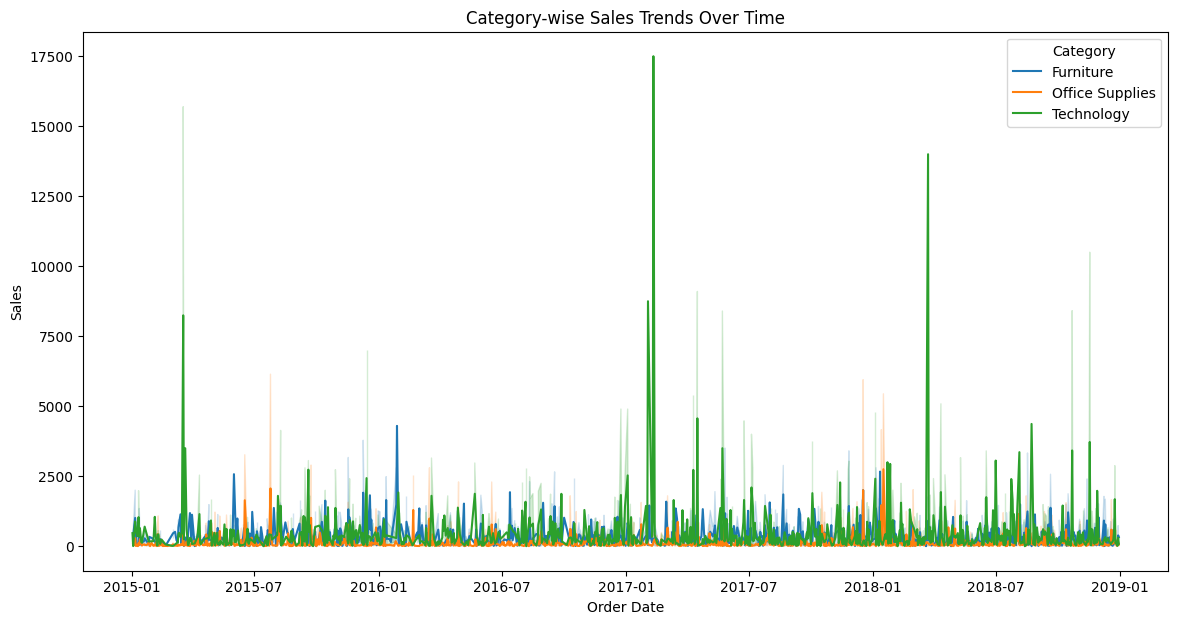

In [46]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Date', y='Sales', hue='Category', data=df)
plt.title('Category-wise Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

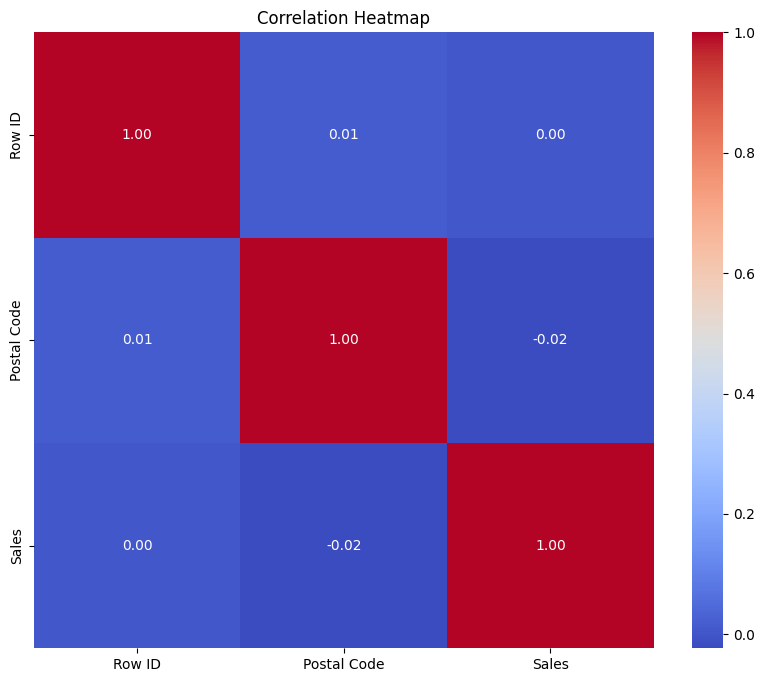

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-49-e9bd101bdce2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, ci=None)


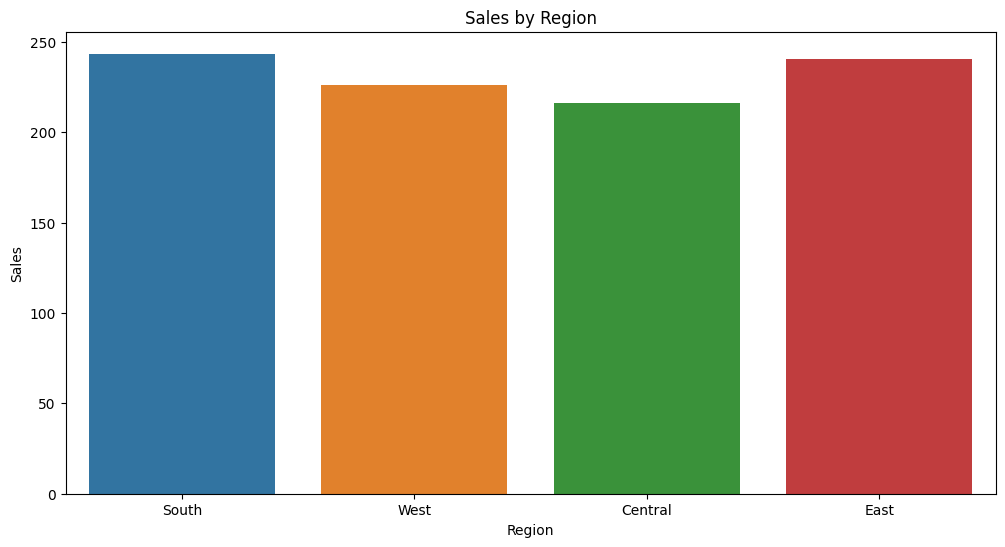

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=df, ci=None)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

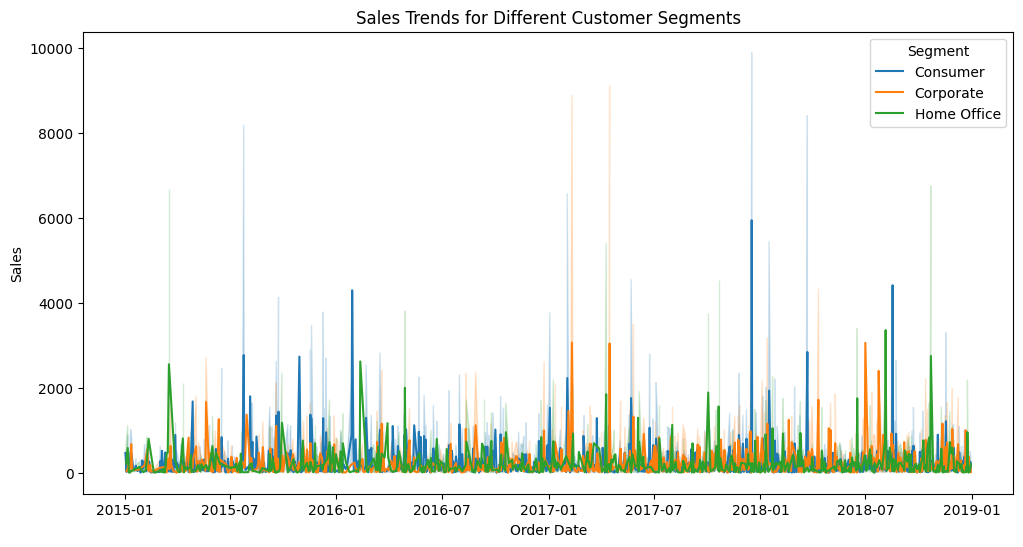

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', hue='Segment', data=df)
plt.title('Sales Trends for Different Customer Segments')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()